#### Import necessary libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np

#### Load and preprocess the MNIST dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#### Normalize pixel values to be between 0 and 1

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

#### Build the CNN model

In [4]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#### Compile the model

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Reshape and preprocess the data

In [6]:
train_images = train_images.reshape(-1, 28, 28, 1)

In [7]:
test_images = test_images.reshape(-1, 28, 28, 1)

#### Train the model

In [8]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 77s 39ms/step - loss: 0.1457 - accuracy: 0.9548
Epoch 2/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0442 - accuracy: 0.9860
Epoch 3/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0314 - accuracy: 0.9899
Epoch 4/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0237 - accuracy: 0.9927
Epoch 5/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0193 - accuracy: 0.9937


#### Evaluate the model on test data

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 9s 28ms/step - loss: 0.0370 - accuracy: 0.9891


In [14]:
print("_"*40)
print(f'Test accuracy: {test_acc}')
print("_"*40)

________________________________________
Test accuracy: 0.9890999794006348
________________________________________


#### Make predictions

In [11]:
predictions = model.predict(test_images)

313/313 [==============================] - 5s 16ms/step


#### Function to display a few test images and their predicted labels

In [19]:
import matplotlib.pyplot as plt

def plot_images(images, labels, predictions):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(f"Actual: {labels[i]}\nPredicted: {np.argmax(predictions[i])}")

#### Plot some test images with their predicted labels

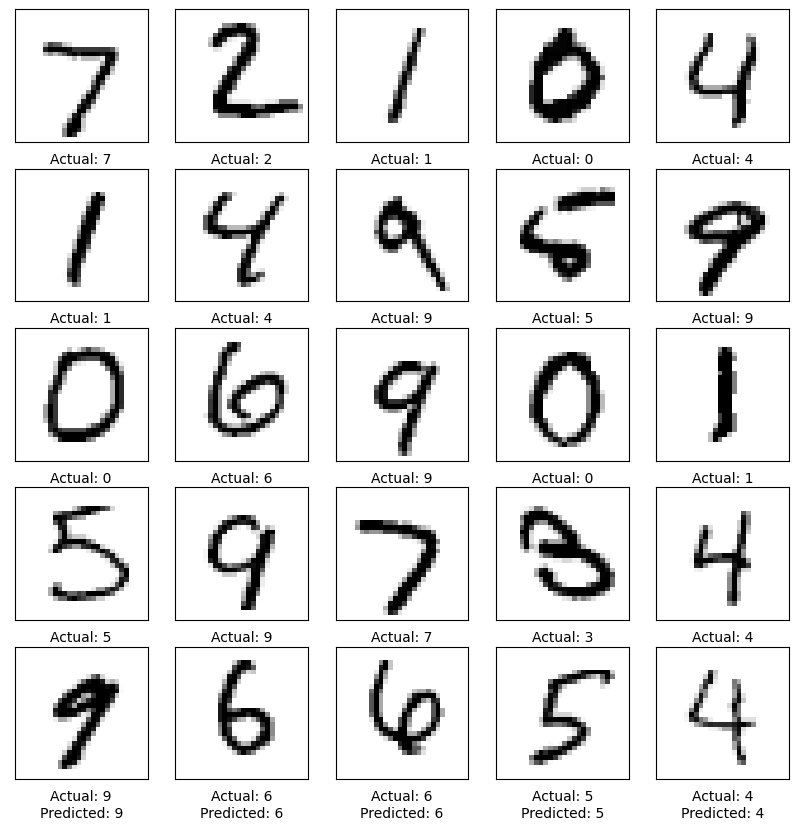

In [20]:
plot_images(test_images, test_labels, predictions)
plt.show()